In [1]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have

In [2]:
pip install pandas_ta 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=7f0069dc21ccda8d8c9a2860f516d20b7eeaff104f3af4eaa14927cae70791af
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


Here I Install gensim which is needed to load vectors from the .kv file

In [3]:

from gensim.models import KeyedVectors
import numpy as np
# Setting the script name.
script_name = "Reliance"

# Load the word embeddings
link = "/kaggle/input/trading-dataset/Machine Learning Assignment Dataset/Reliance_embeddings.kv"
word_vectors = KeyedVectors.load(link, mmap='r')

# Getting the vector keys (or filenames in this case)
metadata = word_vectors.index_to_key
W=[]
# Print the first 5 keys and their associated vectors
for key in metadata:  # Adjust the range as needed to print more or fewer keys
    W.append(word_vectors[key])
    


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import
%matplotlib inline

# Load CSV
load_csv = pd.read_csv("/kaggle/input/trading-dataset/Machine Learning Assignment Dataset/Reliance.csv")
df = pd.DataFrame(load_csv)
df['date'] = pd.to_datetime(df['date'])

df


,date,open,high,low,close,volume
0,2015-03-20 09:15:00+05:30,425.00,426.25,425.00,425.00,1186
1,2015-03-20 09:16:00+05:30,424.50,425.00,424.20,425.00,768
2,2015-03-20 09:17:00+05:30,425.00,425.90,425.00,425.15,425
3,2015-03-20 09:18:00+05:30,425.90,425.95,425.85,425.85,659
4,2015-03-20 09:19:00+05:30,426.25,426.40,425.15,425.15,1548
...,...,...,...,...,...,...
636371,2022-02-10 15:25:00+05:30,895.40,897.05,895.05,896.00,3506
636372,2022-02-10 15:26:00+05:30,895.50,896.50,895.50,895.55,3895
636373,2022-02-10 15:27:00+05:30,895.75,897.00,895.50,896.60,3673
636374,2022-02-10 15:28:00+05:30,896.60,896.60,894.10,894.90,5958


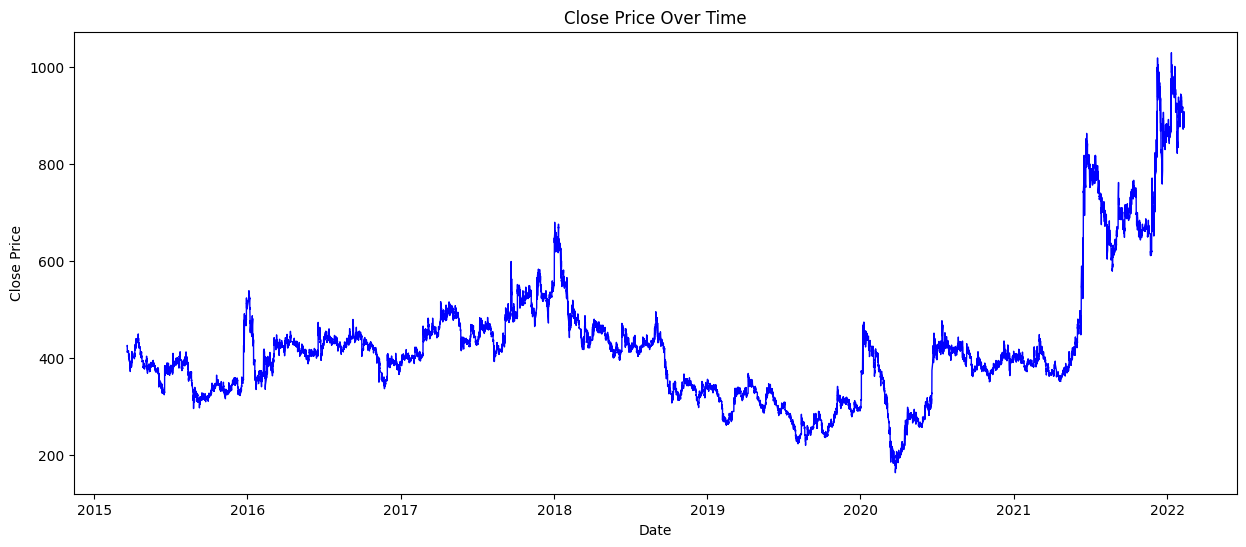

In [5]:
# Plot the 'close' column over time
plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis
plt.plot(df["date"], df['close'], color='blue', linewidth=1)  # Use the date directly for x-axis

plt.show()  # Display the plot

In [6]:
import pandas_ta as ta
Stock_price=df
Stock_price
Stock_price['rsi'] = ta.rsi(Stock_price.close)
Stock_price['ema'] = ta.ema(Stock_price.close)

data= Stock_price[['close']]
data=data.rename(columns={'close':"actual close"})
data['Target'] = Stock_price['close'].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])




In [7]:
cols=['open','high','close','rsi','ema','low','volume','date']

copy_data = Stock_price[cols].copy().shift(1)

data= data.join(copy_data)
data = data.iloc[1:]
Stock_price=data


In [8]:


Stock_price=Stock_price.dropna()
Stock_price

,actual close,Target,open,high,close,rsi,ema,low,volume,date
15,422.50,0.0,423.00,423.05,422.50,25.155261,423.858518,422.50,163.0,2015-03-20 09:29:00+05:30
16,422.65,1.0,422.60,422.75,422.50,25.155261,423.611514,422.10,1578.0,2015-03-20 09:30:00+05:30
17,423.05,1.0,422.75,423.65,422.65,28.165335,423.436694,422.65,1188.0,2015-03-20 09:31:00+05:30
18,423.50,1.0,422.65,423.35,423.05,35.602974,423.366386,422.65,583.0,2015-03-20 09:32:00+05:30
19,423.80,1.0,423.60,423.75,423.50,42.780611,423.390679,423.10,775.0,2015-03-20 09:33:00+05:30
...,...,...,...,...,...,...,...,...,...,...
636371,896.00,1.0,894.55,895.45,895.05,52.132730,894.692265,894.55,2450.0,2022-02-10 15:24:00+05:30
636372,895.55,0.0,895.40,897.05,896.00,55.620044,894.930035,895.05,3506.0,2022-02-10 15:25:00+05:30
636373,896.60,1.0,895.50,896.50,895.55,53.627033,895.042756,895.50,3895.0,2022-02-10 15:26:00+05:30
636374,894.90,0.0,895.75,897.00,896.60,57.457590,895.325891,895.50,3673.0,2022-02-10 15:27:00+05:30


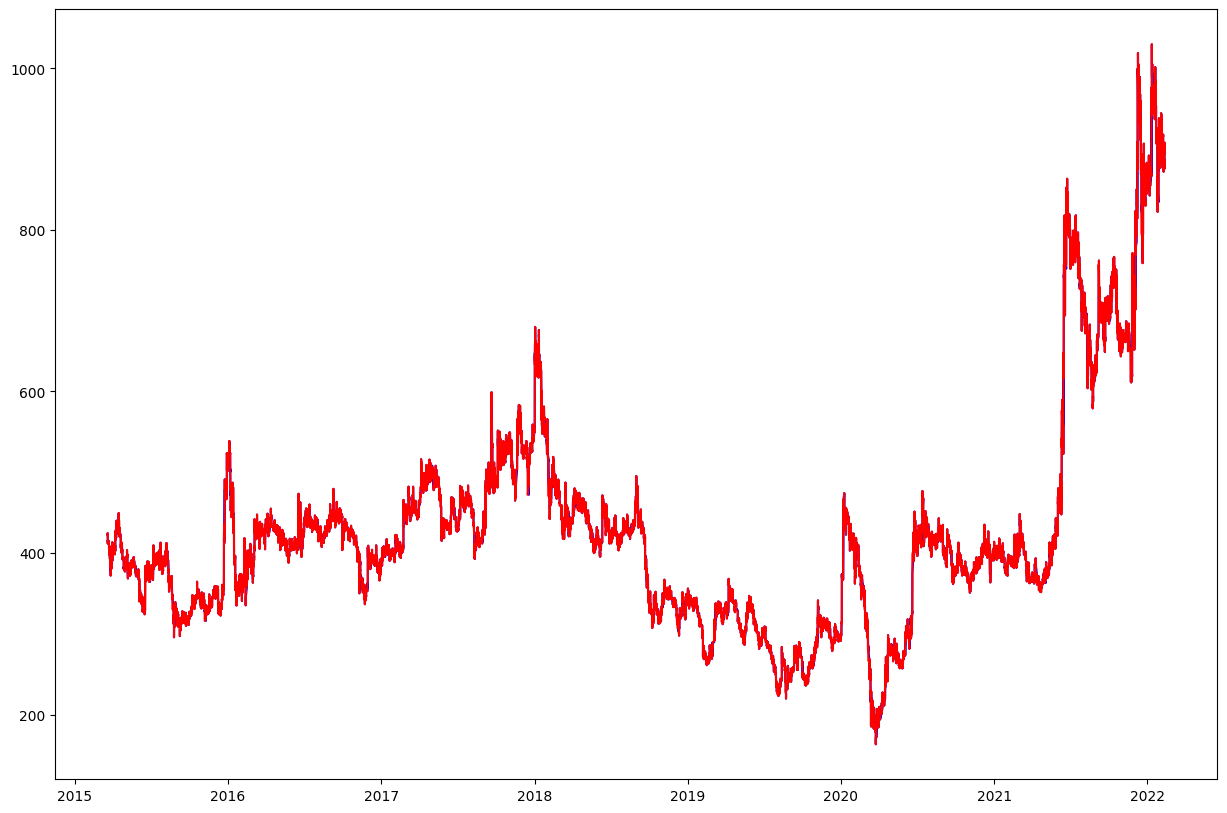

In [9]:
plt.figure(figsize=(15,10))
plt.plot(Stock_price['date'],Stock_price['close'],color='blue')
plt.plot(Stock_price['date'],Stock_price['actual close'],color='red')


Here is the stock prices along the data time

In [10]:
Input_data = Stock_price.drop(columns=['date'])

In [11]:

Stock= Stock_price.drop(columns=['date'])
Input_data = np.array(Stock.iloc[:29979])
Validation_data = np.array(Stock.iloc[29979:])
Cross_validation = np.array(Stock.iloc[29979:])
Output_data = W
Input_data

array([[4.22500000e+02, 0.00000000e+00, 4.23000000e+02, ...,
        4.23858518e+02, 4.22500000e+02, 1.63000000e+02],
       [4.22650000e+02, 1.00000000e+00, 4.22600000e+02, ...,
        4.23611514e+02, 4.22100000e+02, 1.57800000e+03],
       [4.23050000e+02, 1.00000000e+00, 4.22750000e+02, ...,
        4.23436694e+02, 4.22650000e+02, 1.18800000e+03],
       ...,
       [3.89000000e+02, 0.00000000e+00, 3.90650000e+02, ...,
        3.89975865e+02, 3.89350000e+02, 1.05800000e+03],
       [3.89000000e+02, 0.00000000e+00, 3.89450000e+02, ...,
        3.89798435e+02, 3.88650000e+02, 9.48000000e+02],
       [3.89000000e+02, 0.00000000e+00, 3.89000000e+02, ...,
        3.89653265e+02, 3.89000000e+02, 3.20800000e+03]])

pp install pan

In [12]:

import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data preparation
# Assuming you have your OHLC data in a NumPy array `ohlc_data` with shape (n_samples, 4)
# And the corresponding 512-dimensional vectors in a NumPy array `vectors` with shape (n_samples, 512)

# Example of random data (replace this with your actual data)
n_samples = 29979
X = Input_data  # OHLC data (replace with actual OHLC data)
y = Output_data  # 512-dimensional vectors (replace with actual vectors)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Wrap XGBoost with MultiOutputRegressor to handle multi-output regression
multi_output_model = MultiOutputRegressor(xgb_model)

multi_output_model.fit(X,y)

y_pred = multi_output_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict vectors for new OHLC records (replace `new_ohlc_data` with actual data)
new_ohlc_data = Validation_data  # Example data (replace with actual new OHLC data)
predicted_vectors = multi_output_model.predict(new_ohlc_data)

predicted_vectors

Mean Squared Error: 0.00019496071035973728


array([[2.6540671e-05, 2.7677086e-06, 1.8179569e-03, ..., 6.0470386e-05,
        8.9033675e-01, 2.6574789e-08],
       [2.6540671e-05, 2.7677086e-06, 1.5932639e-03, ..., 4.5398214e-05,
        8.9024681e-01, 2.6574789e-08],
       [2.6540671e-05, 2.7677086e-06, 4.0783258e-03, ..., 4.3425705e-05,
        8.8941985e-01, 2.6574789e-08],
       ...,
       [3.8386905e-05, 2.7677086e-06, 1.7778729e-03, ..., 8.1563521e-05,
        8.9297432e-01, 2.6574789e-08],
       [3.8386905e-05, 2.7677086e-06, 1.7983618e-03, ..., 8.1563521e-05,
        8.9422363e-01, 2.6574789e-08],
       [3.8386905e-05, 2.7677086e-06, 8.9914241e-04, ..., 8.1563521e-05,
        8.8974607e-01, 2.6574789e-08]], dtype=float32)

In [13]:
# Concatenate the new vectors with the given vectors 
print(np.array(Output_data).shape)
print(predicted_vectors.shape)
combined_vectors = np.vstack((Output_data,predicted_vectors))
print(combined_vectors.shape)
print(Stock_price.shape)


(29979, 512)
(606382, 512)
(636361, 512)
(636361, 10)


In [14]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.decomposition import PCA

# Assuming input_data is your OHLC and additional data
# Combine input data with vectors


pca = PCA(n_components=6)  # Reduce to 6 components
arr_reduced = pca.fit_transform(combined_vectors)
combined_data = np.hstack((Stock_price,arr_reduced))

cols= ['actual close','Target','open','high','close','rsi','ema' ,'low','volume','date','x1','x2','x3','x4','x5','x6']

df= pd.DataFrame(combined_data,columns=cols)





In [15]:
df.to_csv("Sample.csv")

In [16]:
df

,actual close,Target,open,high,close,rsi,ema,low,volume,date,x1,x2,x3,x4,x5,x6
0,422.5,0.0,423.0,423.05,422.5,25.155261,423.858518,422.5,163.0,2015-03-20 09:29:00+05:30,0.070318,0.077877,-0.235598,0.093268,0.018886,0.019133
1,422.65,1.0,422.6,422.75,422.5,25.155261,423.611514,422.1,1578.0,2015-03-20 09:30:00+05:30,-0.047746,0.06907,-0.24279,0.09355,0.040386,0.0009
2,423.05,1.0,422.75,423.65,422.65,28.165335,423.436694,422.65,1188.0,2015-03-20 09:31:00+05:30,-0.054119,0.057533,-0.230384,0.029622,0.105446,0.016376
3,423.5,1.0,422.65,423.35,423.05,35.602974,423.366386,422.65,583.0,2015-03-20 09:32:00+05:30,-0.04711,0.055782,-0.225614,0.020907,0.114987,-0.026042
4,423.8,1.0,423.6,423.75,423.5,42.780611,423.390679,423.1,775.0,2015-03-20 09:33:00+05:30,0.009254,0.04687,-0.194553,0.057882,0.154643,-0.025676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636356,896.0,1.0,894.55,895.45,895.05,52.13273,894.692265,894.55,2450.0,2022-02-10 15:24:00+05:30,0.154962,0.079861,0.069171,-0.042985,-0.020574,-0.006977
636357,895.55,0.0,895.4,897.05,896.0,55.620044,894.930035,895.05,3506.0,2022-02-10 15:25:00+05:30,0.159406,0.080415,0.074242,-0.073874,0.011616,-0.016943
636358,896.6,1.0,895.5,896.5,895.55,53.627033,895.042756,895.5,3895.0,2022-02-10 15:26:00+05:30,0.185261,0.079969,0.096566,-0.080027,0.010589,-0.014149
636359,894.9,0.0,895.75,897.0,896.6,57.45759,895.325891,895.5,3673.0,2022-02-10 15:27:00+05:30,0.179673,0.078638,0.108853,-0.081898,0.017227,-0.012029


In [17]:
df= df.dropna()

X,y = df.drop(columns=['actual close','date']),df['actual close']

X= np.array(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.7049887394657595


In [19]:
predicted_prices=xgb_model.predict(X)
df['predicted_prices'] = predicted_prices

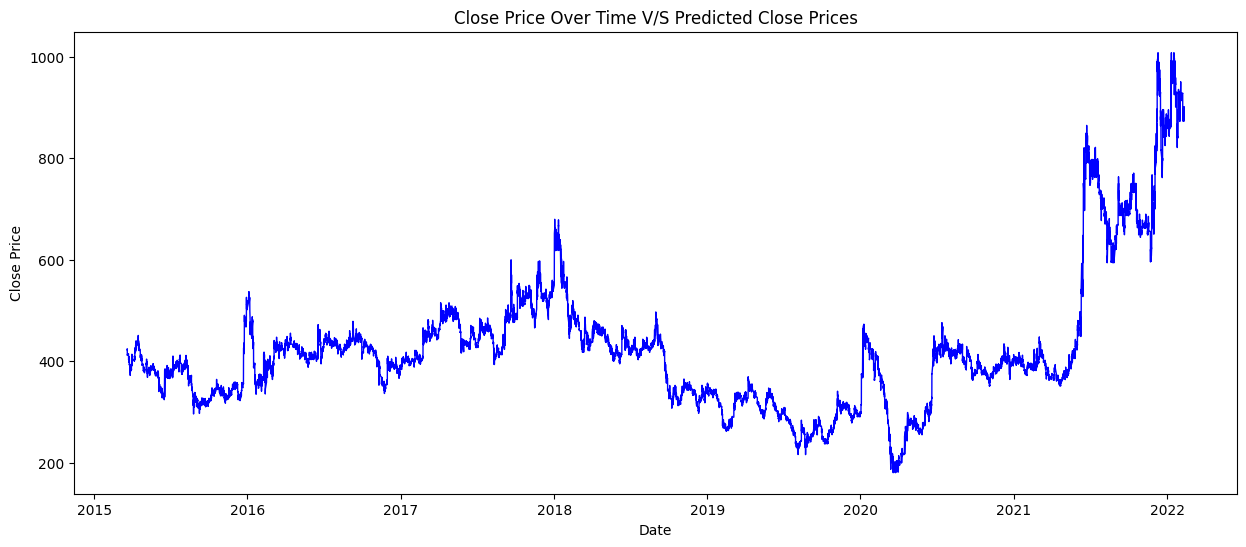

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time V/S Predicted Close Prices")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis

# Plot predicted closing prices (using test data)
plt.plot(df['date'],df['predicted_prices'], color='blue', linewidth=1, label='Predicted Close Prices')
# Set up date formatting for better visualization


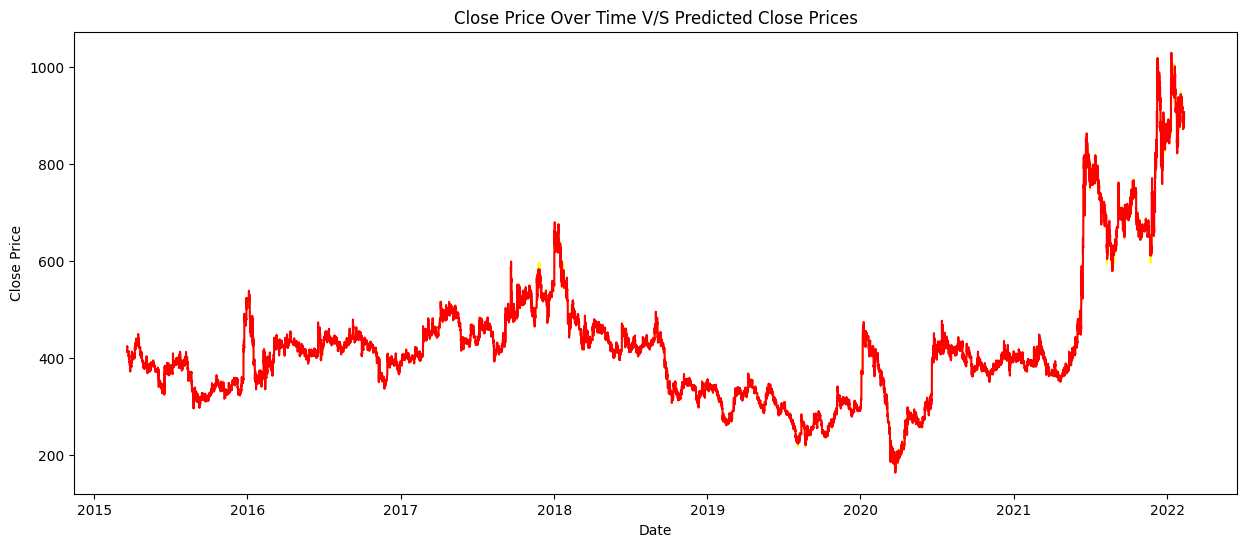

In [21]:
# Lets overlap it with the actual_close price
plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time V/S Predicted Close Prices")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis

plt.plot(df['date'],df['predicted_prices'],color='yellow', linewidth=1, label='Predicted Close Prices')
plt.plot(df['date'],df['actual close'],color='red')
plt.show()

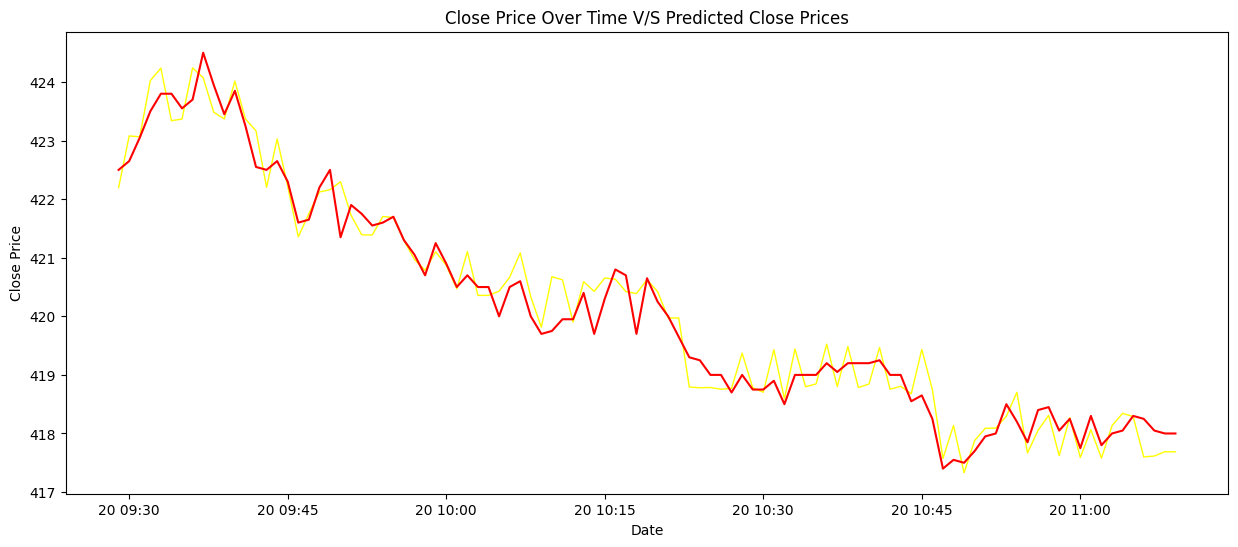

In [22]:
plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time V/S Predicted Close Prices")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis

plt.plot(df['date'].loc[:100],df['predicted_prices'].loc[:100],color='yellow', linewidth=1, label='Predicted Close Prices')
plt.plot(df['date'].loc[:100],df['actual close'].loc[:100],color='red')
plt.show()